In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../report/metrics/all_datasets.csv')

In [36]:
df['picking_type'] = df['model'].apply(lambda x : x[-2:])
df['num_extra_picked'] = df['model'].apply(lambda x : str(int(x.split('_')[1][:-2])))

In [54]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [21]:
# sns.pairplot(df, hue='picking_type');

In [37]:
df.head(3)

,dataset,model,correctly predicted,incorrectly predicted,total predicted positives,num of positives in ground truth,TP,TN,FP,FN,accuracy,precision,recall,f1,picking_type,num_extra_picked
0,sew,sew_00000ba,8151,1849,8566,9417,8067,84,499,1350,81.51,0.890258,0.8151,0.849731,ba,0
1,sew,sew_00010cp,9664,336,9401,9417,9241,423,160,176,96.64,0.966843,0.9664,0.966613,cp,10
2,sew,sew_00100cp,9416,584,9999,9417,9416,0,583,1,94.16,0.886793,0.9416,0.913375,cp,100


<AxesSubplot:xlabel='picking_type', ylabel='correctly predicted'>

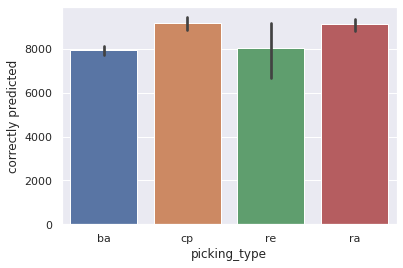

In [56]:
sns.barplot(data=df, x='picking_type', y='correctly predicted')

<AxesSubplot:xlabel='num_extra_picked', ylabel='f1'>

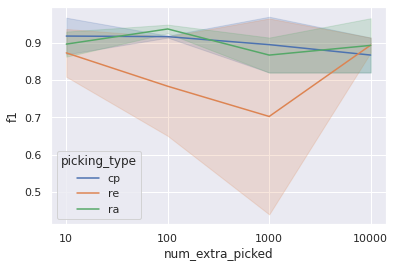

In [55]:
sns.lineplot(data=df[df['picking_type'] != 'ba'], y='f1', hue='picking_type', x='num_extra_picked')
# sns.lineplot(data=df, y='f1', x='num_extra_picked', hue='picking_type')

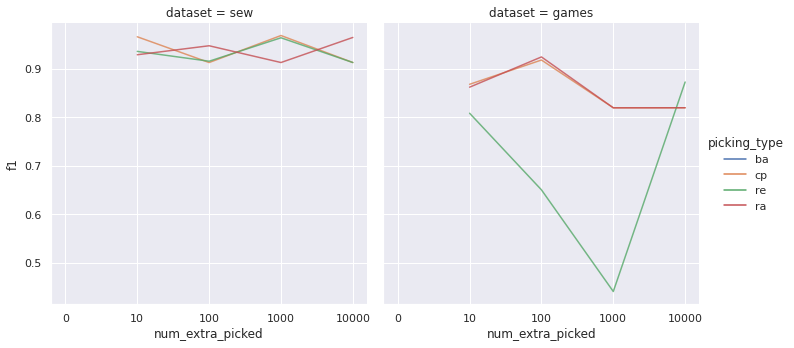

In [51]:
sns.relplot(
    data=df, x="num_extra_picked", y="f1",
    col="dataset", hue="picking_type", alpha=.8,
    kind="line"
)

re : random (balanced 50/50)
ra : random (not balanced)
cp : cherry picked

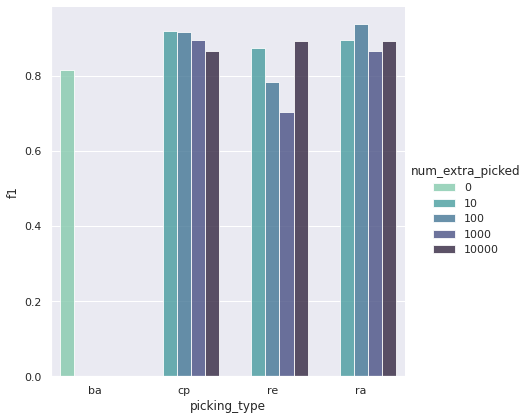

In [63]:
g = sns.catplot(
    data=df, kind="bar",
    x="picking_type", y="f1", hue="num_extra_picked",
    ci=None, palette="mako_r", alpha=.8, height=6
)